In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import f1_score, r2_score, accuracy_score, recall_score, precision_score,  roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [7]:
# loading the dataset
data = pd.read_csv('../content/bank-additional-full.csv')

# Check the header of the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [8]:
# Check all labels along with their data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Rename target data column
data=data.rename(columns={'y': 'signup'})

In [10]:
# Remap the education column
data['education']=data['education'].replace(['primary', 'secondary', 'tertiary'], ['elementry', 'high school', 'university'])

In [11]:
# Count the # of customers who signup for the account (target)
data.signup.value_counts()

no     36548
yes     4640
Name: signup, dtype: int64

In [12]:
from datetime import datetime
tmp=[]
for i in range(0, len(data)):
      tmp=datetime.strptime(data['month'][i], '%b').month
data=data.assign(monthnum = tmp)

In [13]:
# Map the target column from yes/no to 1/0
tmp2=[]
for i in range(0, len(data)):
      if data.signup[i]=='yes':
        tmp2.append(int(1))
      else:
        tmp2.append(int(0))
data=data.assign(signup2 = tmp2)

In [14]:
# review the stats for all numeric label of the dataset
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,monthnum,signup2
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.0,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010,11.0,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074,0.0,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000,11.0,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000,11.0,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,11.0,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000,11.0,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000,11.0,1.000000


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,signup,monthnum,signup2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,11,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,11,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,11,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,11,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,11,0


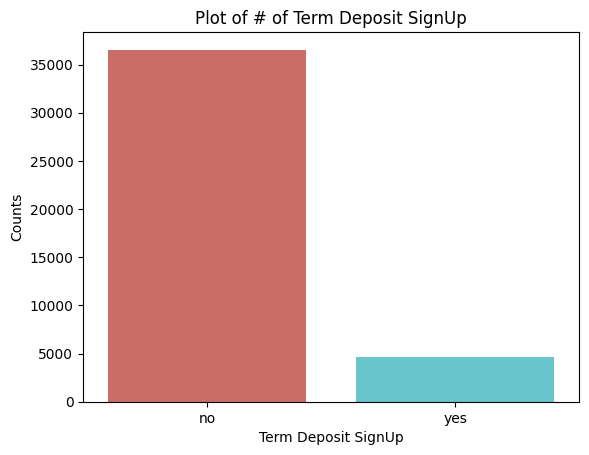

In [15]:
# Plot the countplot of the target data to check for imbalance
sns.countplot(x='signup',data=data,palette='hls')

# Add labels
plt.title('Plot of # of Term Deposit SignUp')
plt.xlabel('Term Deposit SignUp')
plt.ylabel('Counts')
plt.show()

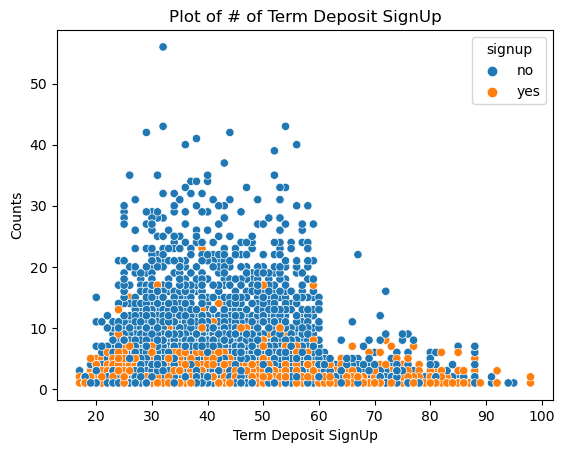

In [ ]:
# Plot the scatterplot of # of campaign against age and # of signup
sns.scatterplot(data=data, x="age", y="campaign", hue="signup")
# Add labels
plt.title('Plot of # of Term Deposit SignUp')
plt.xlabel('Term Deposit SignUp')
plt.ylabel('Counts')
plt.show()

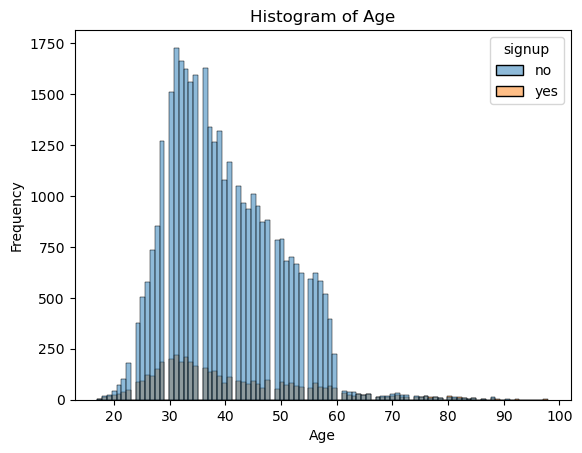

In [ ]:
# Plot the histogram of customer's age
sns.histplot(data=data, x="age", hue="signup")
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

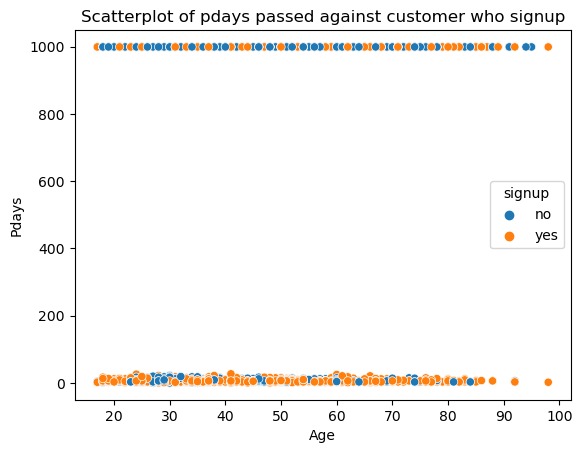

In [ ]:
# Plot the scatterplot of day passed of previous campaign against signups
sns.scatterplot(data=data, x="age", y="pdays", hue="signup")
# Add labels
plt.title('Scatterplot of pdays passed against customer who signup')
plt.xlabel('Age')
plt.ylabel('Pdays')
plt.show()

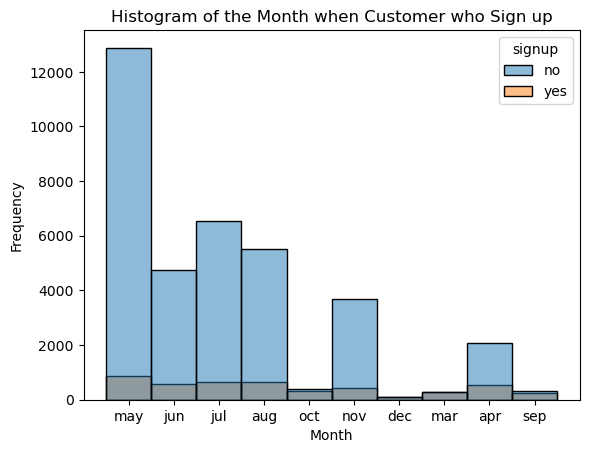

In [ ]:
# Plot the histogram of month during signup
sns.histplot(data=data, x="month", hue="signup")
# Add labels
plt.title('Histogram of the Month when Customer who Sign up')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

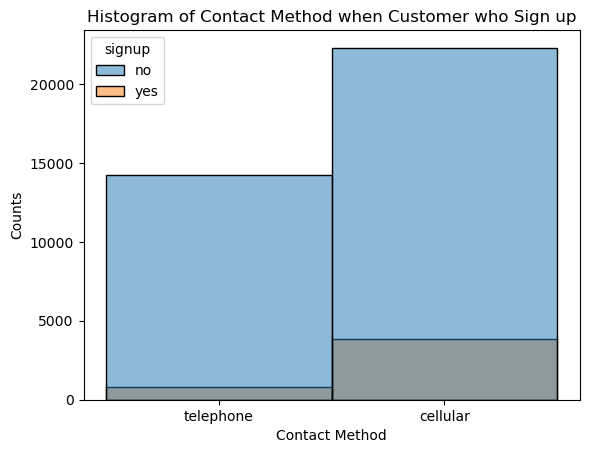

In [ ]:
# Plot the histogram of month during signup
sns.histplot(data=data, x="contact", hue="signup")
# Add labels
plt.title('Histogram of Contact Method when Customer who Sign up')
plt.xlabel('Contact Method')
plt.ylabel('Counts')
plt.show()

In [ ]:
# Review all data by grouping signup column
data.groupby('signup').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,monthnum,signup2
signup,,,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.136752,11.0,0.0
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.201078,11.0,1.0


In [ ]:
# Review all data by grouping job column
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,monthnum,signup2
job,,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.112263,11.0,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.569051,11.0,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.304258,11.0,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.514151,11.0,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.660739,11.0,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.329651,11.0,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.664321,11.0,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.564626,11.0,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5086.005714,11.0,0.314286


In [ ]:
# Review all data by grouping marital column
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,monthnum,signup2
marital,,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.865351,11.0,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.830151,11.0,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.184734,11.0,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.362500,11.0,0.150000


In [ ]:
# Review all data by grouping education column
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,monthnum,signup2
education,,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.108238,11.0,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.678883,11.0,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.258726,11.0,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.974356,11.0,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.722222,11.0,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.139615,11.0,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.222387,11.0,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.552282,11.0,0.145003


In [16]:
#Create transformer for numeric features
numeric_features = ['age','campaign','pdays','previous','monthnum','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
#Create transformer for categorical features
categorical_features = ['housing','loan','default','education','contact','day_of_week']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
#Create preprocessor to transform both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [18]:
# Drop columns that has no direct impact to the target output
X=data.drop(columns=['signup','signup2','marital','job','poutcome','duration'])
y=data.signup2

In [59]:
#Create pipeline for Logistic Regression
log_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('logreg', LogisticRegression())
    ]
)
log_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'monthnum',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan', 'default',
                                                   'education', 'contact',
                                                   'day_of_week'])])),
                ('logreg', LogisticRegression())])

In [60]:
# Split the data into training and test data with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

log_pipe.fit(X_train, y_train)
print("model score: %.3f" % log_pipe.score(X_test, y_test))

model score: 0.899


In [20]:
#Create pipeline for Decision Tree
dt_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('dtree', DecisionTreeClassifier())
    ]
)
dt_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'monthnum',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan', 'default',
                                                   'education', 'contact',
                                                   'day_of_week'])])),
                ('dtree', DecisionTreeClassifier())])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt_pipe.fit(X_train, y_train)
print("model score: %.3f" % dt_pipe.score(X_test, y_test))

model score: 0.848


In [26]:
#Create pipeline for SVM Model
svm_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('svm', SVC(probability=True))
    ]
)
svm_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'monthnum',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan', 'default',
                                                   'education', 'contact',
                                                   'day_of_week'])])),
                ('svm', SVC(probability=True))])

In [62]:
# Fit the training data against the SVM model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm_pipe.fit(X_train, y_train)
print("model score: %.3f" % svm_pipe.score(X_test, y_test))

model score: 0.899


In [63]:
#Create pipeline for KNN model
knn_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=3))
    ]
)
knn_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'monthnum',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan', 'default',
                                                   'education', 'contact',
                                                   'day_of_week'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [64]:
# Fit the training data against the SVM model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn_pipe.fit(X_train, y_train)
print("model score: %.3f" % knn_pipe.score(X_test, y_test))

model score: 0.888


In [28]:
results=cross_validate(log_pipe, X_train, y_train, return_train_score=True)
print(sorted(results.keys()))
results

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([0.35175061, 0.37887716, 0.39513826, 0.36038876, 0.35368729]),
 'score_time': array([0.0266993 , 0.02507544, 0.03387165, 0.03760004, 0.046556  ]),
 'test_score': array([0.89578637, 0.90461325, 0.89871661, 0.90079778, 0.90287895]),
 'train_score': array([0.90196844, 0.8998049 , 0.90171255, 0.90119228, 0.90006503])}

In [29]:
results2=cross_validate(dt_pipe, X_train, y_train, return_train_score=True)
print(sorted(results2.keys()))
results2

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([0.20710421, 0.22161698, 0.21534514, 0.21328259, 0.19922352]),
 'score_time': array([0.01712871, 0.01701498, 0.01885486, 0.01745415, 0.01783013]),
 'test_score': array([0.84393966, 0.84720777, 0.83125217, 0.8456469 , 0.83870968]),
 'train_score': array([0.99215227, 0.99275959, 0.99258617, 0.99189248, 0.99223932])}

In [30]:
results3=cross_validate(knn_pipe, X_train, y_train, return_train_score=True)
print(sorted(results2.keys()))
results3

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([0.07772398, 0.07163715, 0.07109642, 0.12486362, 0.07303667]),
 'score_time': array([0.85719609, 0.85633922, 0.83237433, 1.71646214, 0.82993579]),
 'test_score': array([0.88191434, 0.89039195, 0.88310787, 0.88067985, 0.89021852]),
 'train_score': array([0.92325702, 0.92148277, 0.92339042, 0.92421418, 0.92074572])}

In [33]:
results4=cross_validate(svm_pipe, X_train, y_train, return_train_score=True)
print(sorted(results4.keys()))
results4

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([112.23273373, 114.71486139, 112.05378437, 112.19220233,
        124.24856544]),
 'score_time': array([2.45569634, 2.51516581, 2.46170473, 2.50725436, 4.89489961]),
 'test_score': array([0.89526617, 0.90443982, 0.90045092, 0.90045092, 0.90253208]),
 'train_score': array([0.90496011, 0.90270973, 0.90392369, 0.90457403, 0.90379363])}

In [34]:
# Creating a dataframe for the score result from 4 models
comp = ({
    'model':['Logistic Regression','SVM','kNN', 'Decision Tree'],
    'test score' :[log_pipe.score(X_test, y_test),svm_pipe.score(X_test, y_test),knn_pipe.score(X_test, y_test),dt_pipe.score(X_test, y_test)],
    'training score' :[log_pipe.score(X_train, y_train),svm_pipe.score(X_train, y_train),knn_pipe.score(X_train, y_train),dt_pipe.score(X_train, y_train)],
    'average fit time':[results['fit_time'].mean(),results4['fit_time'].mean(),results3['fit_time'].mean(),results2['fit_time'].mean()]
               })
comp_df = pd.DataFrame(comp)
print(comp_df)

                 model  test score  training score  average fit time
0  Logistic Regression    0.898762        0.900940          0.367968
1                  SVM    0.899409        0.903576        115.088429
2                  kNN    0.887918        0.922791          0.083672
3        Decision Tree    0.848183        0.990913          0.211314


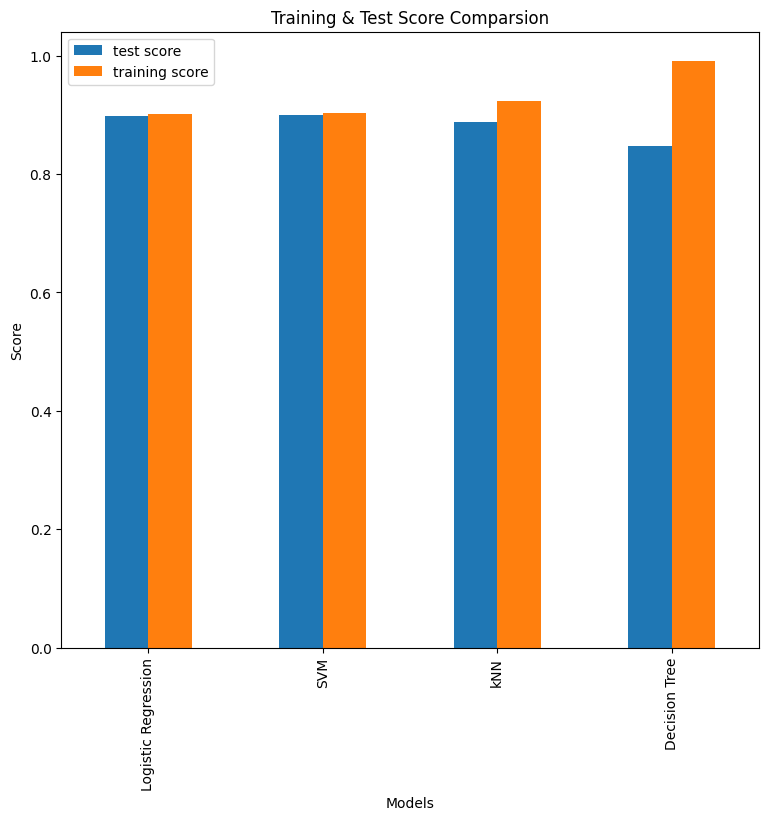

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(comp_df, columns=['model','test score', 'training score'])
df.plot(x='model', y=['test score', 'training score'], kind="bar", figsize=(9, 8))
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Training & Test Score Comparsion")
plt.legend(['test score', 'training score'])
plt.show()

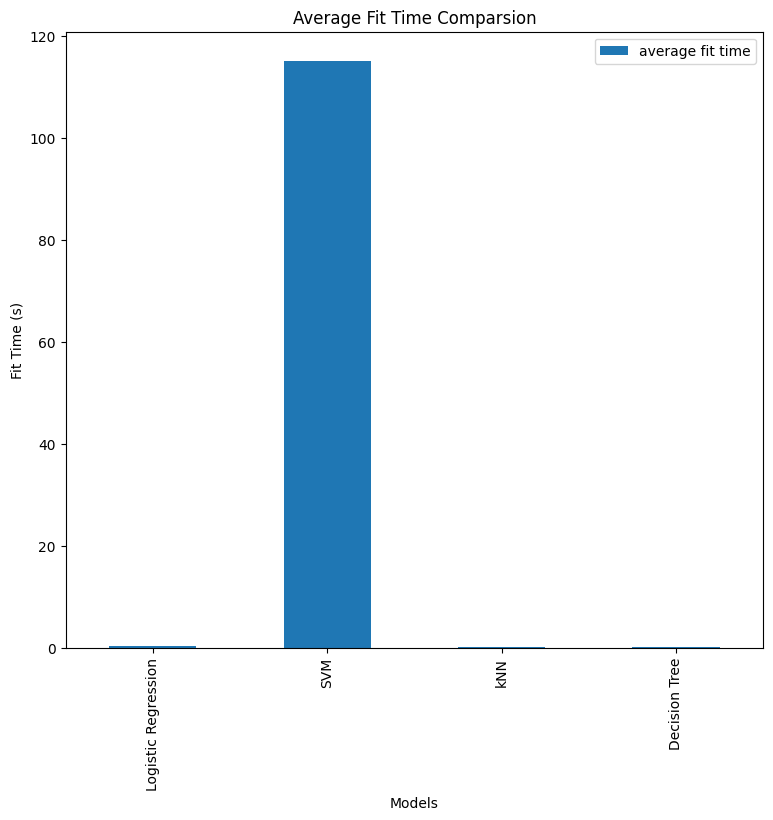

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(comp_df, columns=['model','average fit time'])
df.plot(x='model', y=['average fit time'], kind="bar", figsize=(9, 8))
plt.xlabel("Models")
plt.ylabel("Fit Time (s)")
plt.title("Average Fit Time Comparsion")
plt.legend(['average fit time'])
plt.show()

In [38]:
# Creating a dataframe for the score result from Logistic Reg model
y_pred=log_pipe.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)
prec_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_log: .2f}\nPrecision: {prec_log: .2f}\nRecall: {recall_log: .2f}\nf1: {f1_log: .2f}')

Accuracy:  0.90
Precision:  0.65
Recall:  0.21
f1:  0.32


In [39]:
# Creating a dataframe for accuracy, precisiom, recall and f1 from Decision Tree model
y_pred=dt_pipe.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)
prec_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_dt: .2f}\nPrecision: {prec_dt: .2f}\nRecall: {recall_dt: .2f}\nf1: {f1_dt: .2f}')

Accuracy:  0.85
Precision:  0.34
Recall:  0.36
f1:  0.35


In [40]:
# Creating a dataframe for accuracy, precisiom, recall and f1 from SVM model
y_pred=svm_pipe.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
prec_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_svm: .2f}\nPrecision: {prec_svm: .2f}\nRecall: {recall_svm: .2f}\nf1: {f1_svm: .2f}')

Accuracy:  0.90
Precision:  0.64
Recall:  0.24
f1:  0.35


In [42]:
# Creating a dataframe for accuracy, precisiom, recall and f1 from KNN model
y_pred=knn_pipe.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_knn: .2f}\nPrecision: {prec_knn: .2f}\nRecall: {recall_knn: .2f}\nf1: {f1_knn: .2f}')

Accuracy:  0.89
Precision:  0.50
Recall:  0.29
f1:  0.37


In [43]:
# Creating a dataframe as summary tabl for accuracy, precisiom, recall and f1
comp2 = ({
    'model':['Logistic Regression','SVM','kNN', 'Decision Tree'],
    'Accuracy' :[acc_log,acc_svm,acc_knn,acc_dt],
    'Precision' :[prec_log,prec_svm,prec_knn,prec_dt],
    'Recall' :[recall_log,recall_svm,recall_knn,recall_dt],
    'f1' :[f1_log,f1_svm,f1_knn,f1_dt]
               })
comp2_df = pd.DataFrame(comp2)
print(comp2_df)

                 model  Accuracy  Precision    Recall        f1
0  Logistic Regression  0.898762   0.653244  0.210375  0.318256
1                  SVM  0.899409   0.641879  0.236311  0.345445
2                  kNN  0.887918   0.501840  0.294669  0.371312
3        Decision Tree  0.848183   0.336022  0.360231  0.347705


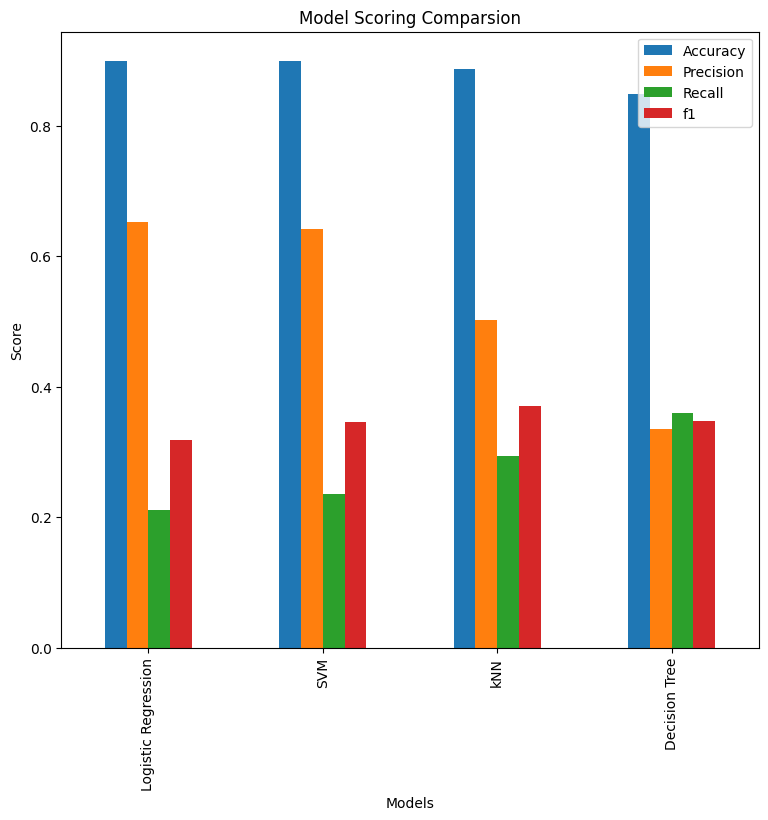

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(comp2_df, columns=['model','Accuracy', 'Precision', 'Recall','f1'])
df.plot(x='model', y=['Accuracy', 'Precision', 'Recall','f1'], kind="bar", figsize=(9, 8))
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Scoring Comparsion")
plt.legend(['Accuracy', 'Precision','Recall','f1'])
plt.show()
plt.show()

In [45]:
# Creating a dataframe as summary table for ROC Curve
print('roc_auc_score for LogReg:', roc_auc_score(y, log_pipe.predict_proba(X)[:,1]))
print('roc_auc_score for DT:', roc_auc_score(y, dt_pipe.predict_proba(X)[:,1]))
print('roc_auc_score for SVM:', roc_auc_score(y, svm_pipe.predict_proba(X)[:,1]))
print('roc_auc_score for kNN:', roc_auc_score(y, knn_pipe.predict_proba(X)[:,1]))

roc_auc_score for LogReg: 0.7815789338677903
roc_auc_score for DT: 0.8907745582804663
roc_auc_score for SVM: 0.784577040042759
roc_auc_score for kNN: 0.8747636345259706


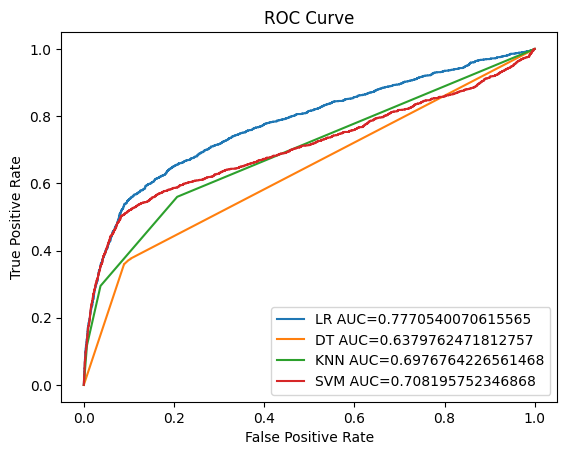

In [46]:
# Plotting ROC Curve data for all 4 models
y_pred_proba = log_pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

y_pred_proba_dt = dt_pipe.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_proba_dt, pos_label=1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_dt)

y_pred_proba_knn = knn_pipe.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_proba_knn, pos_label=1)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_knn)

y_pred_proba_svm = svm_pipe.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_proba_svm, pos_label=1)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_svm)

# Create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="LR AUC="+str(auc))
plt.plot(fpr2,tpr2,label="DT AUC="+str(auc2))
plt.plot(fpr3,tpr3,label="KNN AUC="+str(auc3))
plt.plot(fpr4,tpr4,label="SVM AUC="+str(auc4))
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [65]:
# Combine feature names and coefficients into a dataframe
df_coef = pd.DataFrame({'feature': log_pipe[:-1].get_feature_names_out(), 'coef': log_pipe.named_steps['logreg'].coef_[0]})
df_coef.sort_values(by='coef', ascending=False, inplace=True)

# calculate the absolute value of the coefficients and sort
df_coef['abs_coef'] = df_coef['coef'].abs()
df_coef.sort_values(by='abs_coef', ascending=False, inplace=True)
df_coef

,feature,coef,abs_coef
5,num__emp.var.rate,-1.095149,1.095149
6,num__cons.price.idx,0.704451,0.704451
28,cat__contact_telephone,-0.531053,0.531053
23,cat__education_illiterate,0.386014,0.386014
27,cat__contact_cellular,0.353962,0.353962
2,num__pdays,-0.345941,0.345941
30,cat__day_of_week_mon,-0.217874,0.217874
7,num__cons.conf.idx,0.213368,0.213368
21,cat__education_basic.9y,-0.205894,0.205894
17,cat__default_unknown,-0.176847,0.176847
